In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/content/questions.csv')

In [7]:
df.shape

(404351, 6)

In [10]:
df.head

<bound method NDFrame.head of             id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
404346  404346  789792  789793   
404347  404347  789794  789795   
404348  404348  789796  789797   
404349  404349  789798  789799   
404350  404350  789800  789801   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
404346  How many keywords are there in the Racket prog...   
404347          Do you believe there is life after death?   
404348                                  What is one coin?   
404349  What is the approx annual cost of living while...   
404350              What is like to have sex with cousin?   

                                                question2  is_duplicate  
0       What is the step by step guide to invest in sh...             0  
1       What would happen if the Indian government sto...             0  
2       How can Internet speed be increased by hacking...             0  
3       Find the remainder when [math]23^{24}[/math] i...             0  
4                 Which fish would survive in salt water?             0  
...                                                   ...           ...  
404346  How many keywords are there in PERL Programmin...             0  
404347         Is it true that there is life after death?             1  
404348                                  What's this coin?             0  
404349  I am having little hairfall problem but I want...             0  
404350      What is it like to have sex with your cousin?             0  

[404351 rows x 6 columns]>

In [11]:
new_df = df.sample(30000)

In [12]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [13]:
new_df.duplicated().sum()

0

In [14]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
221247,Are the Liberal Democrat's (UK) The Same as Li...,How do you prevent cloudy water in a betta fis...
251317,Why is the Indian government introduced 2000 n...,Why did the government decide to scrap 1000 ru...
306522,How much does it to file a patent on your own?,How much does it cost to patent something?
187263,What are the best-kept secrets of models?,What are the best-kept secrets of great databa...
131589,"If you own a Mac Pro desktop, what do you use ...",If you owned your own drone (also referred to ...


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [16]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape


(30000, 6000)

In [17]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
221247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
251317,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
306522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131589,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
366693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
183571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
96116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [19]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
221247,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
251317,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
306522,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
187263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131589,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,1,0,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7433333333333333

In [21]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.729

is_duplicate
0    255045
1    149306
Name: count, dtype: int64
is_duplicate
0    63.07515
1    36.92485
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

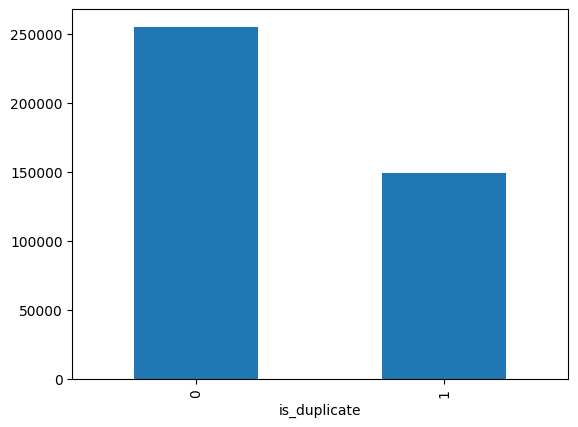

In [22]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [23]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789801
Number of questions getting repeated 13698


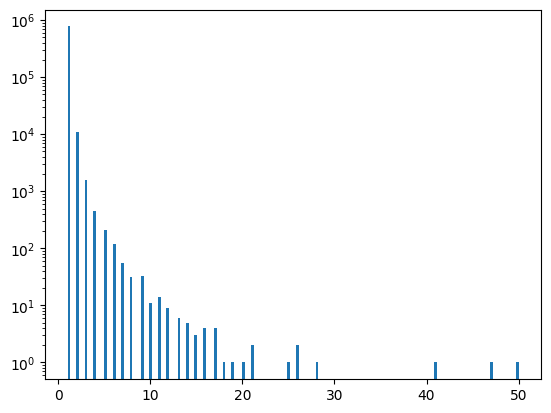

In [24]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [25]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [28]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [33]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [34]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [35]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
221247,221247,436132,436133,are the liberal democrat s uk the same as li...,how do you prevent cloudy water in a betta fis...,0
251317,251317,494781,494782,why is the indian government introduced 2k not...,why did the government decide to scrap 1k rupe...,1
306522,306522,601814,601815,how much does it to file a patent on your own,how much does it cost to patent something,1
187263,187263,369766,369767,what are the best kept secrets of models,what are the best kept secrets of great databa...,0
131589,131589,260632,260633,if you own a mac pro desktop what do you use ...,if you owned your own drone also referred to ...,0


In [36]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [37]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
221247,221247,436132,436133,are the liberal democrat s uk the same as li...,how do you prevent cloudy water in a betta fis...,0,51,52,12,11
251317,251317,494781,494782,why is the indian government introduced 2k not...,why did the government decide to scrap 1k rupe...,1,66,96,12,17
306522,306522,601814,601815,how much does it to file a patent on your own,how much does it cost to patent something,1,45,41,11,8
187263,187263,369766,369767,what are the best kept secrets of models,what are the best kept secrets of great databa...,0,40,57,8,10
131589,131589,260632,260633,if you own a mac pro desktop what do you use ...,if you owned your own drone also referred to ...,0,52,103,14,23


In [38]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [39]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
221247,221247,436132,436133,are the liberal democrat s uk the same as li...,how do you prevent cloudy water in a betta fis...,0,51,52,12,11,0
251317,251317,494781,494782,why is the indian government introduced 2k not...,why did the government decide to scrap 1k rupe...,1,66,96,12,17,7
306522,306522,601814,601815,how much does it to file a patent on your own,how much does it cost to patent something,1,45,41,11,8,6
187263,187263,369766,369767,what are the best kept secrets of models,what are the best kept secrets of great databa...,0,40,57,8,10,7
131589,131589,260632,260633,if you own a mac pro desktop what do you use ...,if you owned your own drone also referred to ...,0,52,103,14,23,8


In [40]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [41]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
221247,221247,436132,436133,are the liberal democrat s uk the same as li...,how do you prevent cloudy water in a betta fis...,0,51,52,12,11,0,20
251317,251317,494781,494782,why is the indian government introduced 2k not...,why did the government decide to scrap 1k rupe...,1,66,96,12,17,7,28
306522,306522,601814,601815,how much does it to file a patent on your own,how much does it cost to patent something,1,45,41,11,8,6,19
187263,187263,369766,369767,what are the best kept secrets of models,what are the best kept secrets of great databa...,0,40,57,8,10,7,18
131589,131589,260632,260633,if you own a mac pro desktop what do you use ...,if you owned your own drone also referred to ...,0,52,103,14,23,8,33


In [42]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [48]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')

from nltk.corpus import stopwords

# Now, use the stopwords
stop_words = set(stopwords.words('english'))
print("Stop words:", stop_words)


Stop words: {'d', 'when', 'in', "won't", 'her', 'yourselves', 'other', 'were', 'i', 'what', 'whom', 'he', 'of', 'weren', 'ourselves', 'yourself', 'or', 'do', 'than', 'should', 'it', 'nor', 'we', 'itself', 'once', "haven't", 'shouldn', 'some', 'all', 'as', "wasn't", 'hasn', 'only', "didn't", 'his', "wouldn't", "she's", 'between', 'my', 'each', 'will', "shouldn't", 'wouldn', "mightn't", "it's", 'm', 'doesn', 'with', 'being', 'your', "don't", 'no', 'don', 'haven', 'under', 'any', 'yours', 'again', 'then', 'same', 'while', 'own', 'a', 'most', 'y', 've', 'll', 'himself', "you'd", "couldn't", 'myself', 'herself', 'during', 'him', "you'll", 'how', 'at', 'out', 'themselves', 'below', 'where', 'few', "shan't", 'are', 'by', 'too', "should've", 'you', 'this', 'o', 'hadn', 'not', 'our', 'had', 'about', 'been', 'now', 's', 'theirs', 'does', 'up', 'hers', "that'll", 'to', 'until', 'so', 'an', 'more', 'be', "doesn't", 'needn', 'ma', 'that', 'before', 'did', 'further', 'mustn', 'shan', 'very', 'ours',

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [49]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [50]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
221247,221247,436132,436133,are the liberal democrat s uk the same as li...,how do you prevent cloudy water in a betta fis...,0,51,52,12,11,0,20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
251317,251317,494781,494782,why is the indian government introduced 2k not...,why did the government decide to scrap 1k rupe...,1,66,96,12,17,7,28,0.571420,0.399996,0.749981,0.428565,0.583328,0.411762,0.0,1.0
306522,306522,601814,601815,how much does it to file a patent on your own,how much does it cost to patent something,1,45,41,11,8,6,19,0.666644,0.499988,0.999975,0.499994,0.749991,0.545450,0.0,1.0
187263,187263,369766,369767,what are the best kept secrets of models,what are the best kept secrets of great databa...,0,40,57,8,10,7,18,0.749981,0.499992,0.999975,0.999975,0.874989,0.699993,0.0,1.0
131589,131589,260632,260633,if you own a mac pro desktop what do you use ...,if you owned your own drone also referred to ...,0,52,103,14,23,8,33,0.249994,0.111110,0.749991,0.599994,0.538457,0.349998,1.0,1.0


In [57]:
def lcsubstrings(s1, s2):
    """Find the longest common substring(s) between two strings."""
    m = len(s1)
    n = len(s2)
    lcs = [[0] * (n + 1) for _ in range(m + 1)]
    longest = 0
    substrings = set()

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                lcs[i][j] = lcs[i - 1][j - 1] + 1
                if lcs[i][j] > longest:
                    longest = lcs[i][j]
                    substrings = {s1[i - longest:i]}
                elif lcs[i][j] == longest:
                    substrings.add(s1[i - longest:i])
            else:
                lcs[i][j] = 0

    return substrings


def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0] * 3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    # Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2

    # Longest Common Substring Length Ratio
    strs = list(lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features


In [58]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [59]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
221247,221247,436132,436133,are the liberal democrat s uk the same as li...,how do you prevent cloudy water in a betta fis...,0,51,52,12,11,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,10.5,0.038462
251317,251317,494781,494782,why is the indian government introduced 2k not...,why did the government decide to scrap 1k rupe...,1,66,96,12,17,...,0.399996,0.749981,0.428565,0.583328,0.411762,0.0,1.0,5.0,14.5,0.179104
306522,306522,601814,601815,how much does it to file a patent on your own,how much does it cost to patent something,1,45,41,11,8,...,0.499988,0.999975,0.499994,0.749991,0.545450,0.0,1.0,3.0,9.5,0.404762
187263,187263,369766,369767,what are the best kept secrets of models,what are the best kept secrets of great databa...,0,40,57,8,10,...,0.499992,0.999975,0.999975,0.874989,0.699993,0.0,1.0,2.0,9.0,0.829268
131589,131589,260632,260633,if you own a mac pro desktop what do you use ...,if you owned your own drone also referred to ...,0,52,103,14,23,...,0.111110,0.749991,0.599994,0.538457,0.349998,1.0,1.0,7.0,16.5,0.283019


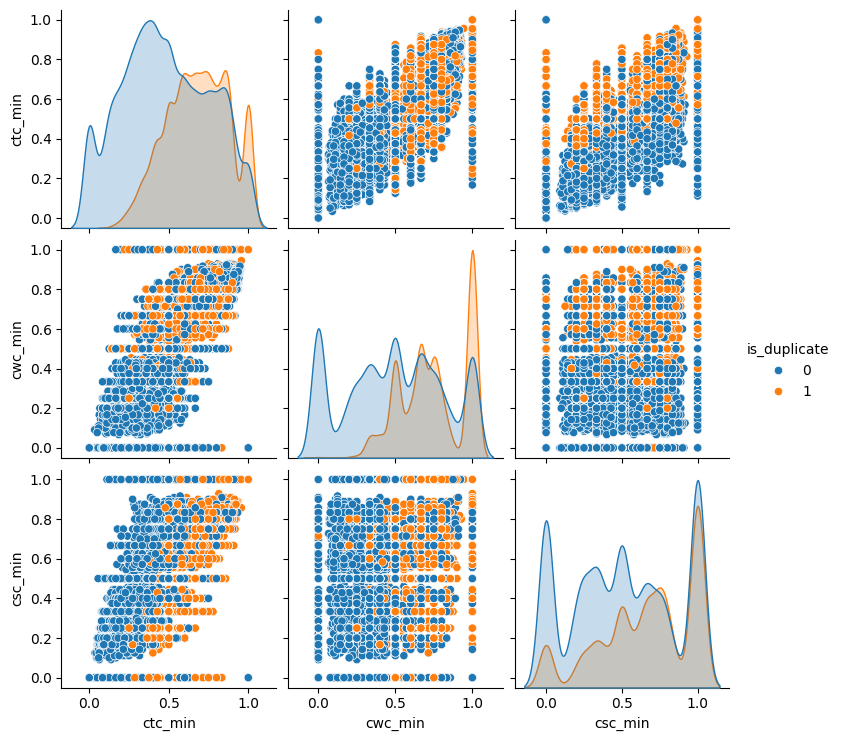

In [62]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

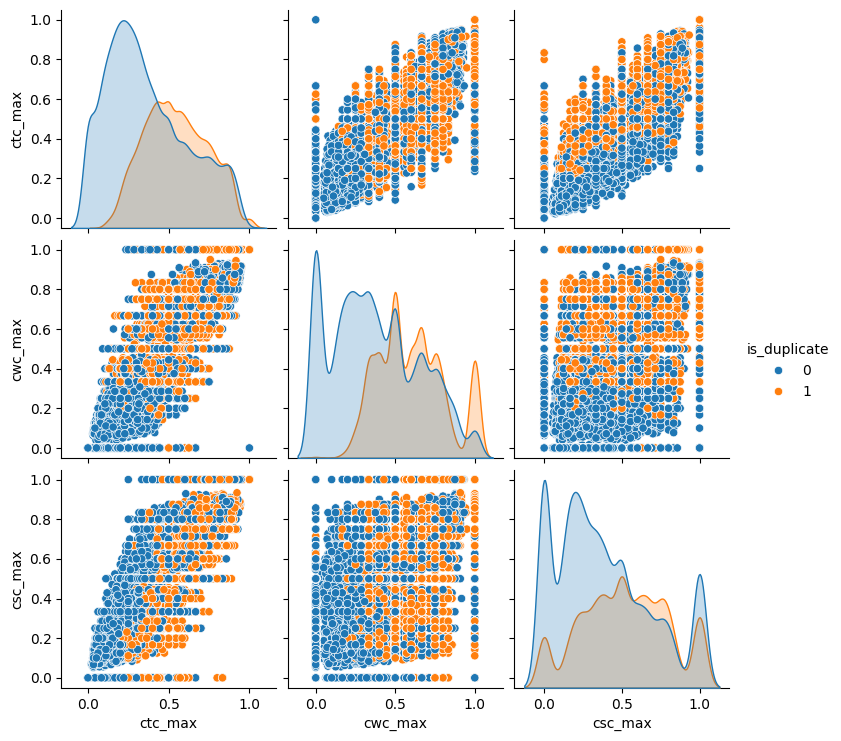

In [63]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

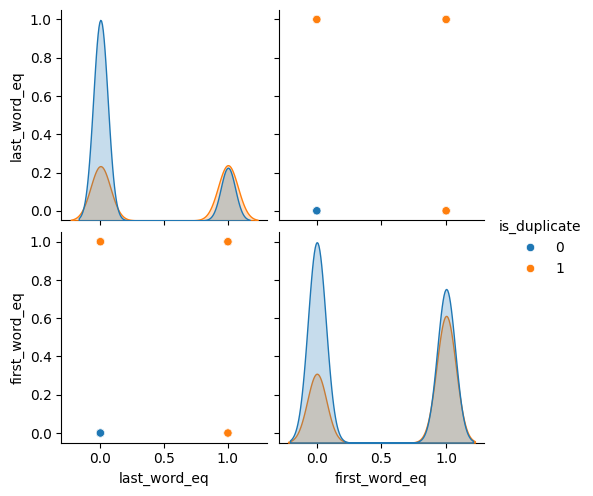

In [64]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

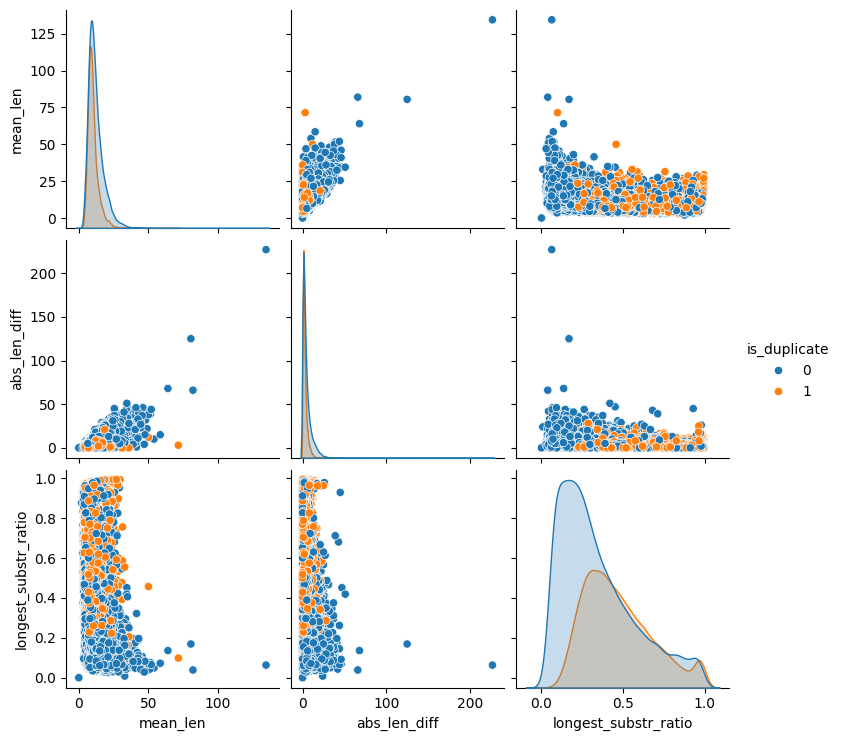

In [65]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')